<a href="https://colab.research.google.com/github/AnniaBenitez/Cores_MOD3_AML/blob/main/CORE3_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler

1. Carga de datos:
- Descarga y carga el dataset «Titanic» desde Kaggle. Realiza una exploración inicial de las variables disponibles, que incluyen información sobre la edad, el género, la clase del pasajero, entre otros.
- Examina cuántos valores faltan en las variables importantes como la edad y el precio del boleto.

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
submission_df = pd.read_csv("gender_submission.csv")

In [ ]:
print("Primeras filas del conjunto de entrenamiento:")
train_df.head()

Primeras filas del conjunto de entrenamiento:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Verificar la estructura del dataset
print("\nInformación del conjunto de entrenamiento:")
print(train_df.info())


Información del conjunto de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
# Estadísticas descriptivas del conjunto de entrenamiento
print("\nEstadísticas descriptivas:")
print(train_df.describe())



Estadísticas descriptivas:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
# Exploración de variables categóricas
print("\nDistribución de la variable 'sex':")
print(train_df['Sex'].value_counts())

print("\nDistribución de la variable 'pclass':")
print(train_df['Pclass'].value_counts())

print("\nDistribución de la variable 'embarked':")
print(train_df['Embarked'].value_counts())



Distribución de la variable 'sex':
Sex
male      577
female    314
Name: count, dtype: int64

Distribución de la variable 'pclass':
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Distribución de la variable 'embarked':
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [ ]:
# Verificar cuántos valores faltan en cada columna
print("\nValores faltantes por columna:")
print(train_df.isnull().sum())

# Foco en columnas importantes
print("\nValores faltantes en 'Age':", train_df['Age'].isnull().sum())
print("Valores faltantes en 'Fare':", train_df['Fare'].isnull().sum())



Valores faltantes por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Valores faltantes en 'Age': 177
Valores faltantes en 'Fare': 0


In [ ]:
# Imputar valores faltantes en 'Age' con la mediana
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Imputar valores faltantes en 'Embarked' con la moda
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Eliminar la columna 'Cabin' por su alta proporción de valores nulos
train_df.drop(columns=['Cabin'], inplace=True)

# Verificar valores faltantes después de la limpieza
print("\nValores faltantes después de la imputación:")
print(train_df.isnull().sum())



Valores faltantes después de la imputación:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-38-34b67bd0eece>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
<ipython-input-38-34b67bd0eece>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

2. Exploración y preprocesamiento de datos:
- Realiza una limpieza de los datos, manejando los valores nulos. Por ejemplo, puedes imputar los valores faltantes de la edad con la mediana o la media según sea conveniente.
- Revisa la distribución de las variables y asegúrate de que las categorías estén codificadas correctamente para el modelado.

In [ ]:
# Imputar valores faltantes en 'Age' con la mediana
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Imputar valores faltantes en 'Embarked' con la moda
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Imputar valores faltantes en 'Fare' con la mediana
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)

# Verificar nuevamente los valores nulos
print("\nValores faltantes después de la imputación:")
print(train_df.isnull().sum())



Valores faltantes después de la imputación:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-39-fec7f9483fdc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
<ipython-input-39-fec7f9483fdc>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
# Codificar la columna 'Sex' a valores numéricos
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

# Codificar la columna 'Embarked' con one-hot encoding
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)

# Verificar el resultado
print("\nDataset después de codificar categorías:")
print(train_df.head())



Dataset después de codificar categorías:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000      

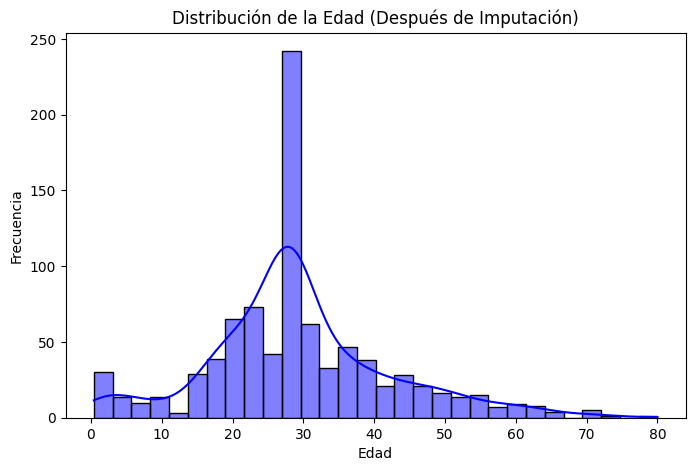

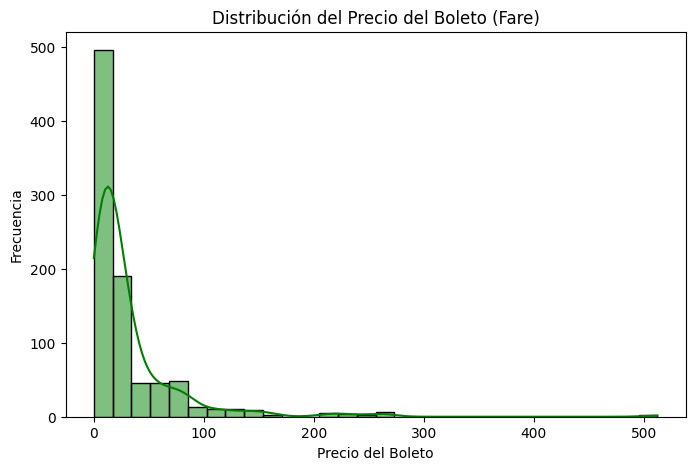

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de la edad después de la imputación
plt.figure(figsize=(8, 5))
sns.histplot(train_df['Age'], bins=30, kde=True, color='blue')
plt.title('Distribución de la Edad (Después de Imputación)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de 'Fare' después de la imputación
plt.figure(figsize=(8, 5))
sns.histplot(train_df['Fare'], bins=30, kde=True, color='green')
plt.title('Distribución del Precio del Boleto (Fare)')
plt.xlabel('Precio del Boleto')
plt.ylabel('Frecuencia')
plt.show()


3. Creación de nuevas características:
- Crea nuevas variables a partir de las existentes. Algunas ideas incluyen:
  - Tamaño de la familia: Combina las variables «SibSp» (número de hermanos/esposos) y «Parch» (número de padres/hijos) para crear una variable que represente el tamaño total de la familia del pasajero.
  - Cabina desconocida: Crea una variable binaria que indique si la cabina de un pasajero es conocida o no, lo cual podría estar relacionado con la clase o la ubicación a bordo.
  - Categoría de tarifa: Agrupa la variable «Fare» en diferentes rangos para crear una variable categórica que represente el nivel de costo del boleto.
  - Título del pasajero: Extrae el título de cada pasajero desde la variable «Name» y crea una nueva variable categórica que represente estos títulos (e.g., Mr., Mrs., Miss.).

In [ ]:
# Crear la variable 'FamilySize' como suma de 'SibSp' y 'Parch'
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1  # +1 incluye al propio pasajero

print("Ejemplo de 'FamilySize':")
print(train_df[['SibSp', 'Parch', 'FamilySize']].head())


Ejemplo de 'FamilySize':
   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


In [ ]:
# Crear categorías de tarifa
train_df['FareCategory'] = pd.cut(
    train_df['Fare'],
    bins=[-1, 7.91, 14.45, 31.0, 512.0],
    labels=['Low', 'Medium', 'High', 'Very High']
)

print("Ejemplo de 'FareCategory':")
print(train_df[['Fare', 'FareCategory']].head())


Ejemplo de 'FareCategory':
      Fare FareCategory
0   7.2500          Low
1  71.2833    Very High
2   7.9250       Medium
3  53.1000    Very High
4   8.0500       Medium


In [ ]:
# Extraer el título del pasajero desde el nombre
train_df['Title'] = train_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

# Agrupar títulos raros en una categoría 'Rare'
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Mlle', 'Ms', 'Lady', 'Sir', 'Capt', 'Countess', 'Jonkheer', 'Dona']
train_df['Title'] = train_df['Title'].replace(rare_titles, 'Rare')

print("Ejemplo de 'Title':")
print(train_df[['Name', 'Title']].head())


Ejemplo de 'Title':
                                                Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr


4. Evaluación de nuevas características:
- Aplica un modelo de machine learning (como un modelo de regresión logística o un árbol de decisión) antes y después de agregar las nuevas características para evaluar su impacto en el rendimiento del modelo.
- Utiliza métricas como la exactitud y el F1-score para comparar el rendimiento con y sin las nuevas variables.

In [ ]:
from sklearn.model_selection import train_test_split

# Seleccionar las columnas relevantes para el modelo (excluyendo 'PassengerId', 'Name', y 'Ticket')
features = train_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
target = train_df['Survived']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (712, 11)
Tamaño del conjunto de prueba: (179, 11)


In [ ]:
# Aplicar one-hot encoding a la columna 'Embarked'
#X_train = pd.get_dummies(X_train, columns=['Embarked'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Embarked'], drop_first=True)

# Asegurarse de que las columnas en el conjunto de prueba coincidan con las del conjunto de entrenamiento
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
# Variables originales
original_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

# Entrenar un modelo con las variables originales
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Filtrar las características originales
X_train_original = X_train[original_features]
X_test_original = X_test[original_features]

# Crear y entrenar el modelo
model_original = LogisticRegression(max_iter=1000, random_state=42)
model_original.fit(X_train_original, y_train)

# Predicciones y métricas
y_pred_original = model_original.predict(X_test_original)
accuracy_original = accuracy_score(y_test, y_pred_original)
f1_original = f1_score(y_test, y_pred_original)

print("Rendimiento sin nuevas características:")
print(f"Exactitud: {accuracy_original:.4f}")
print(f"F1-Score: {f1_original:.4f}")


In [ ]:
# Nuevas características incluidas
new_features = original_features + ['FamilySize', 'CabinKnown', 'FareCategory', 'Title']

# Codificar las nuevas características categóricas
X_train_encoded = pd.get_dummies(X_train[new_features], drop_first=True)
X_test_encoded = pd.get_dummies(X_test[new_features], drop_first=True)

# Asegurarse de que las columnas de entrenamiento y prueba coincidan
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Crear y entrenar el modelo con las nuevas características
model_new = LogisticRegression(max_iter=1000, random_state=42)
model_new.fit(X_train_encoded, y_train)

# Predicciones y métricas
y_pred_new = model_new.predict(X_test_encoded)
accuracy_new = accuracy_score(y_test, y_pred_new)
f1_new = f1_score(y_test, y_pred_new)

print("Rendimiento con nuevas características:")
print(f"Exactitud: {accuracy_new:.4f}")
print(f"F1-Score: {f1_new:.4f}")


In [ ]:
print("\nComparación del rendimiento:")
print(f"Exactitud sin nuevas características: {accuracy_original:.4f}")
print(f"Exactitud con nuevas características: {accuracy_new:.4f}")
print(f"F1-Score sin nuevas características: {f1_original:.4f}")
print(f"F1-Score con nuevas características: {f1_new:.4f}")
